In [1]:
import importlib

from evaluation import repeat_experiment

import dataset_creation 
importlib.reload(dataset_creation)

#import ensembles
#importlib.reload(ensembles)

import networks
importlib.reload(networks)
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 5]

%matplotlib inline
import tensorflow as tf

from ensembles import BootstrapThroughTimeBobStrap,BootstrapEnsemble, ForcedDiversityBootstrapThroughTime3, ForcedDiversityBootstrapThroughTime

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Linear

In [2]:
num_meta_epochs = 3#100#10
num_epochs = 10#50#15#50
seed = 4200
num_samples = 150

model_params = {'num_epochs':num_epochs,'seed':seed,'initialisation_scheme':tf.keras.initializers.he_normal}

dataset_params = {'seed':seed,'num_samples':num_samples}
num_neurons = [10, 10,10]
num_neurons_nonlinear = [10,10,10,10,5]

activations = [tf.nn.tanh]*len(num_neurons)
model_params = {'initialisation_scheme':tf.keras.initializers.he_normal,
                'activations':activations,'num_neurons':num_neurons,
                'num_epochs':num_epochs,'seed':seed}

experiment started at 2018-08-15 09:27:09.117927
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 13.442440032958984 seconds. That means the whole run will probably take 40.32732009887695 more seconds and 0.6721220016479492 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.Ensemble

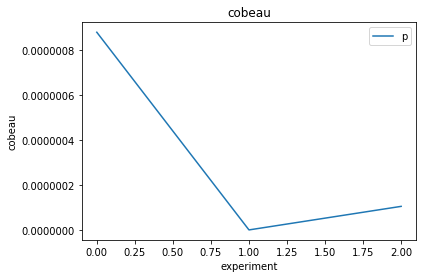

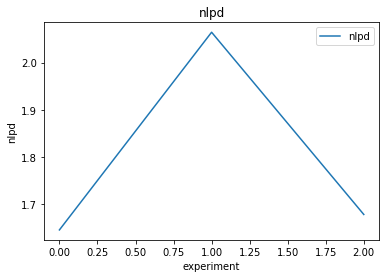

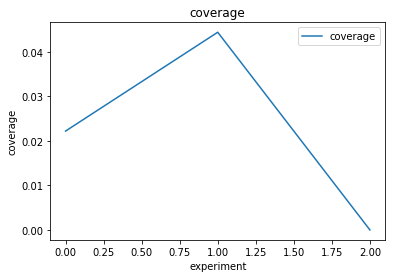

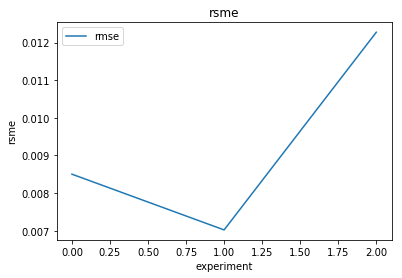

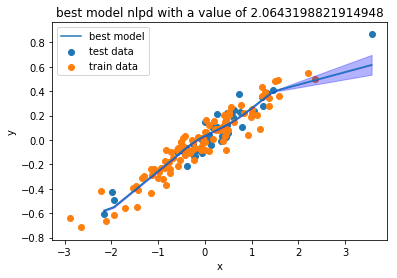

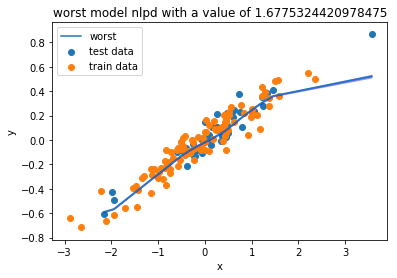

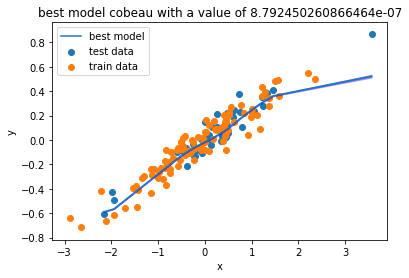

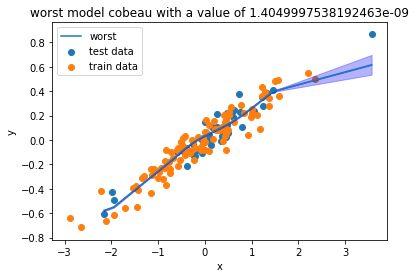

In [3]:
pd = repeat_experiment(BootstrapEnsemble, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 09:27:53.279141
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 44.85143709182739 seconds. That means the whole run will probably take 134.55431127548218 more seconds and 2.2425718545913695 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 151.11755299568176 seconds with 3 experiments
         cobeau  coverage       nlpd      rsme
count  3.000000       3.0   3.000000  3.000000
mean   0.333347       0.0 -14.927405  0.007767
std    0.306925       0.0  13.893560  0.001154
min    0.043329       

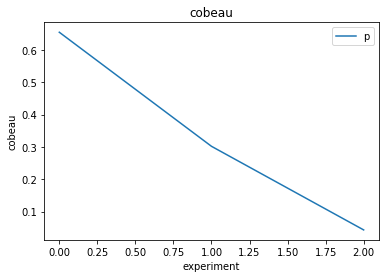

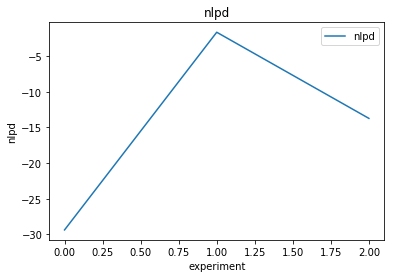

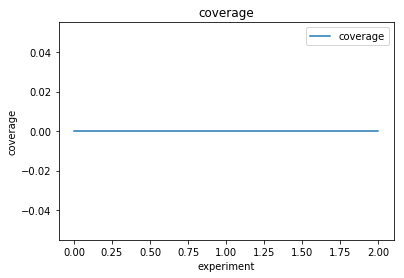

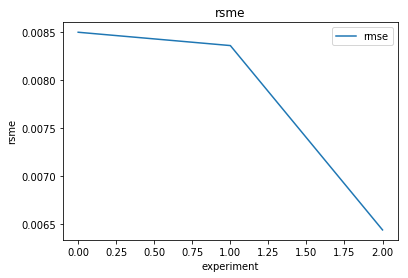

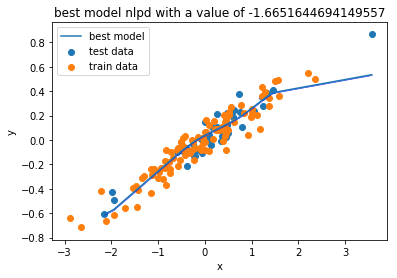

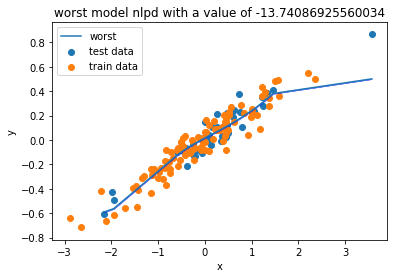

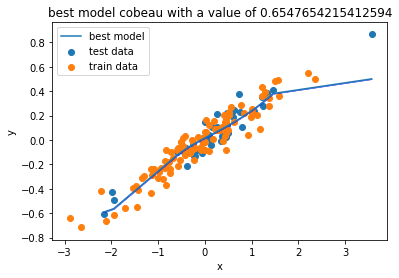

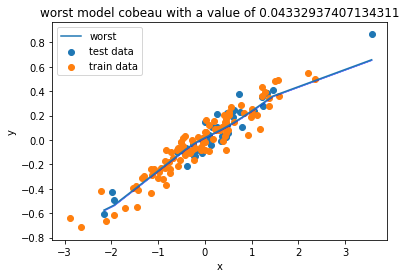

In [4]:
pd1 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

In [5]:
pd2 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 09:30:28.805933
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
experiment number 1 took 56.90936803817749 seconds. That means the whole run will probably take 170.72810411453247 more seconds and 2.8454684019088745 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs


InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [10,10] rhs shape= [10,5]
	 [[Node: save/Assign_22 = Assign[T=DT_FLOAT, _class=["loc:@w_1"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](w_1/Adam_1, save/RestoreV2:22)]]

Caused by op 'save/Assign_22', defined at:
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/asyncio/events.py", line 126, in _run
    self._callback(*self._args)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-df9af323ad30>", line 1, in <module>
    pd2 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.LinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)
  File "/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py", line 99, in repeat_experiment
    model = model_creator(**model_params)  #create a model
  File "/Users/thomas/Documents/Master-Thesis/new_version/ensembles.py", line 368, in __init__
    activations=activations, l2=l2, learning_rate=learning_rate)
  File "/Users/thomas/Documents/Master-Thesis/new_version/ensembles.py", line 253, in __init__
    activations=activations, l2=l2, learning_rate=learning_rate)
  File "/Users/thomas/Documents/Master-Thesis/new_version/ensembles.py", line 181, in __init__
    num_features=self.num_features)
  File "/Users/thomas/Documents/Master-Thesis/new_version/networks.py", line 30, in __init__
    adversarial)
  File "/Users/thomas/Documents/Master-Thesis/new_version/base.py", line 98, in __init__
    self.initialise_graph
  File "/Users/thomas/Documents/Master-Thesis/new_version/helpers.py", line 16, in decorator
    setattr(self, attribute, function(self))
  File "/Users/thomas/Documents/Master-Thesis/new_version/networks.py", line 46, in initialise_graph
    max_to_keep=None
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1284, in __init__
    self.build()
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1296, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1333, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 781, in _build_internal
    restore_sequentially, reshape)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 422, in _AddRestoreOps
    assign_ops.append(saveable.restore(saveable_tensors, shapes))
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 113, in restore
    self.op.get_shape().is_fully_defined())
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/ops/state_ops.py", line 219, in assign
    validate_shape=validate_shape)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/ops/gen_state_ops.py", line 60, in assign
    use_locking=use_locking, name=name)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3414, in create_op
    op_def=op_def)
  File "/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [10,10] rhs shape= [10,5]
	 [[Node: save/Assign_22 = Assign[T=DT_FLOAT, _class=["loc:@w_1"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](w_1/Adam_1, save/RestoreV2:22)]]


# Nonlinear


In [15]:
#num_meta_epochs = 3#10
#num_epochs = 5#50
seed = 42

model_params = {'num_epochs':num_epochs,'seed':seed,'num_neurons':num_neurons_nonlinear}

dataset_params = {'num_samples':num_samples,'seed':seed}
importlib.reload(dataset_creation)

<module 'dataset_creation' from '/Users/thomas/Documents/Master-Thesis/new_version/dataset_creation.py'>

experiment started at 2018-08-15 11:14:39.337067
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 36.95622181892395 seconds. That means the whole run will probably take 110.86866545677185 more seconds and 1.8478110909461976 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.Ensemble

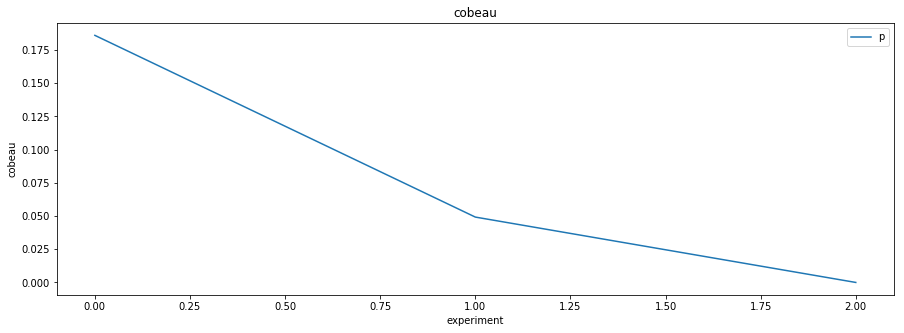

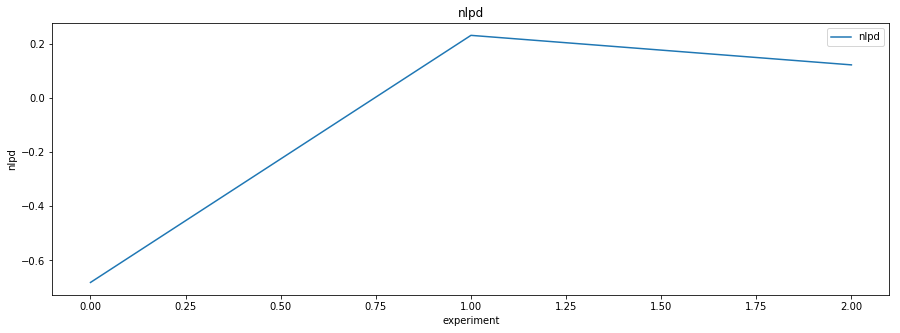

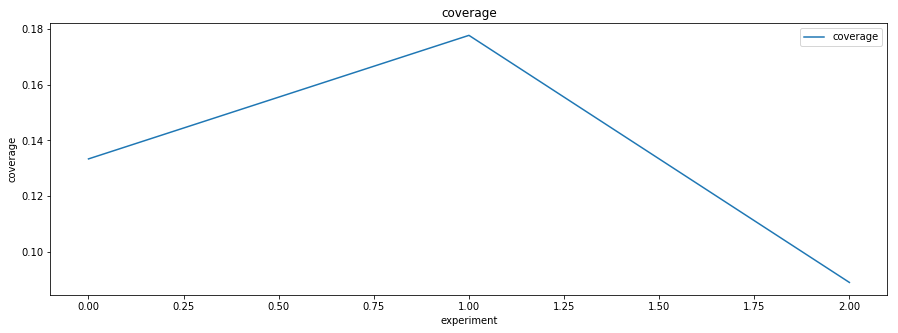

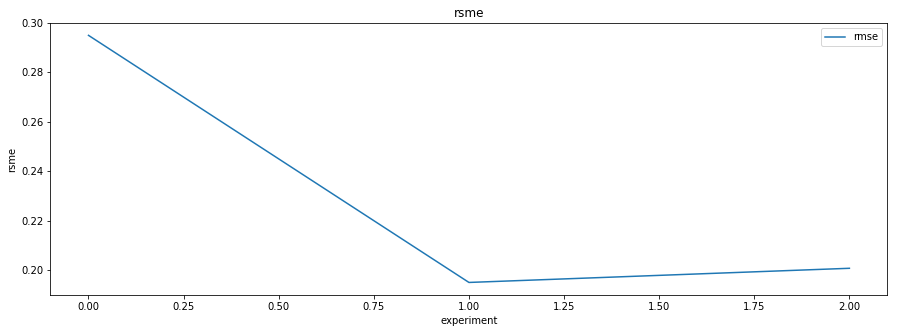

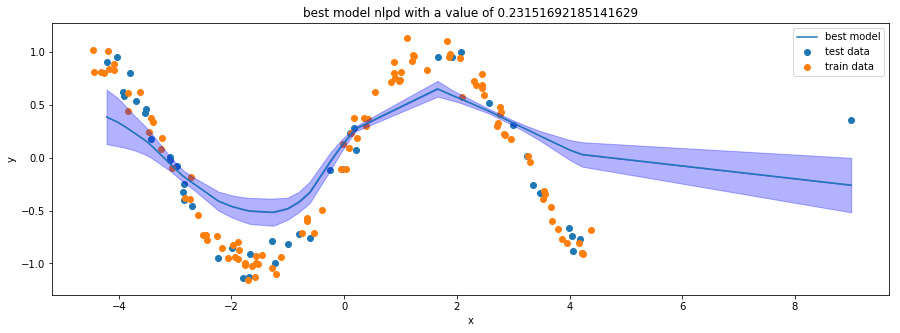

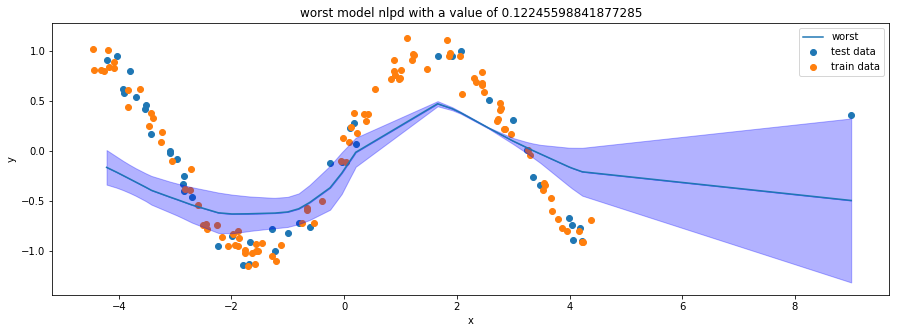

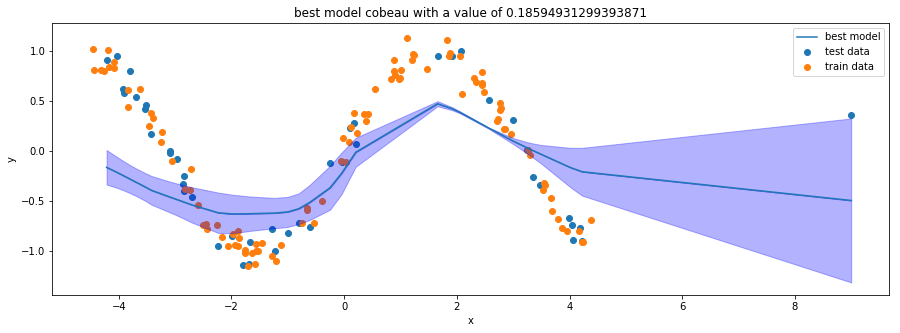

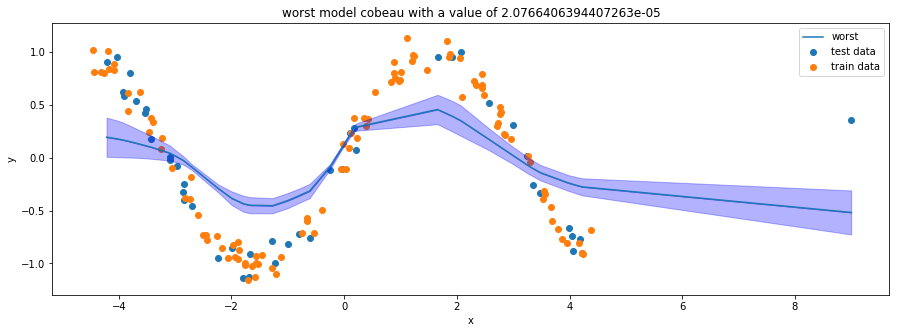

In [16]:
pd11 = repeat_experiment(BootstrapEnsemble, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 11:16:38.521516
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 104.6159360408783 seconds. That means the whole run will probably take 313.8478081226349 more seconds and 5.230796802043915 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 267.7876842021942 seconds with 3 experiments
             cobeau  coverage       nlpd      rsme
count  3.000000e+00  3.000000   3.000000  3.000000
mean   2.739927e-01  0.014815 -17.266007  0.139137
std    4.745367e-01  0.012830  15.526026  0.061612
min    2.

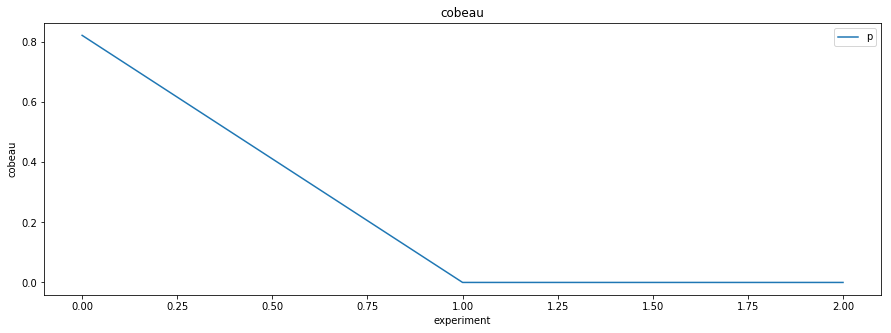

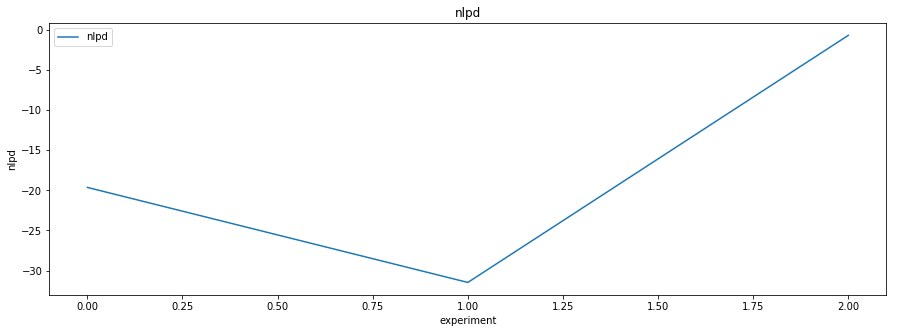

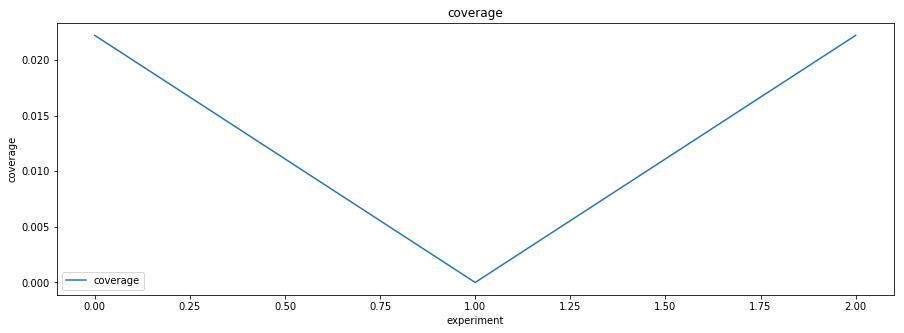

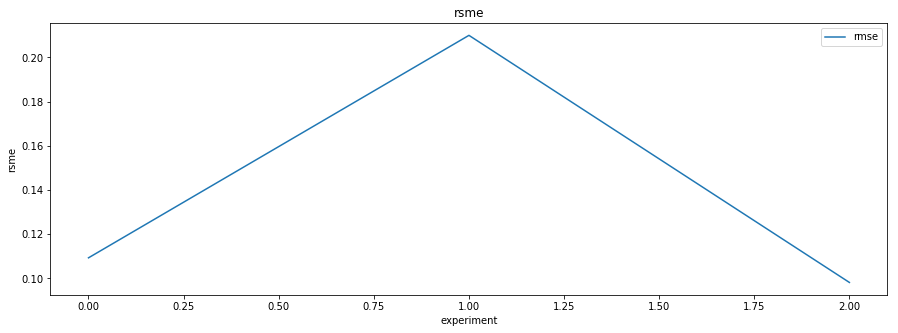

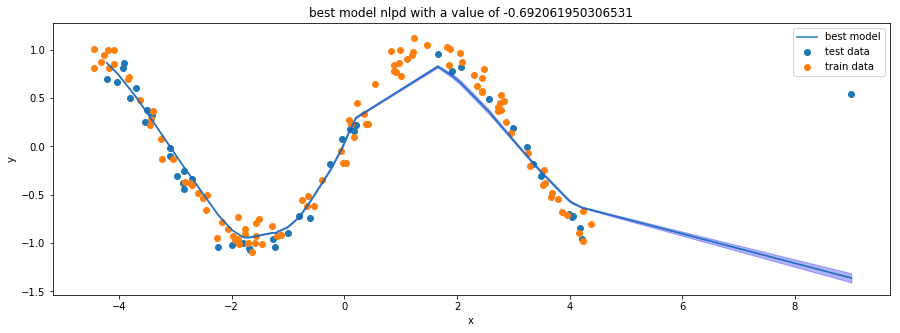

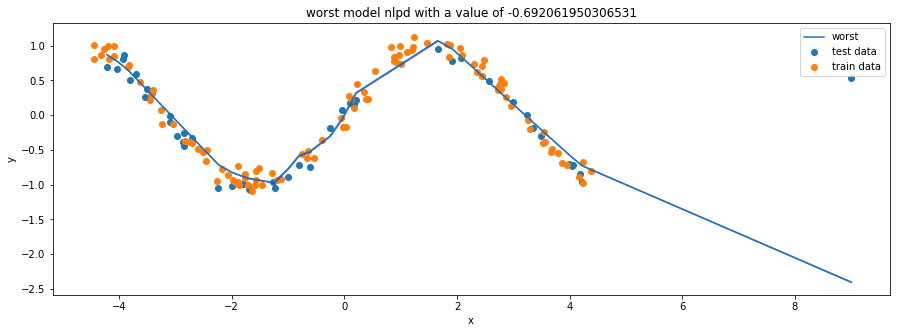

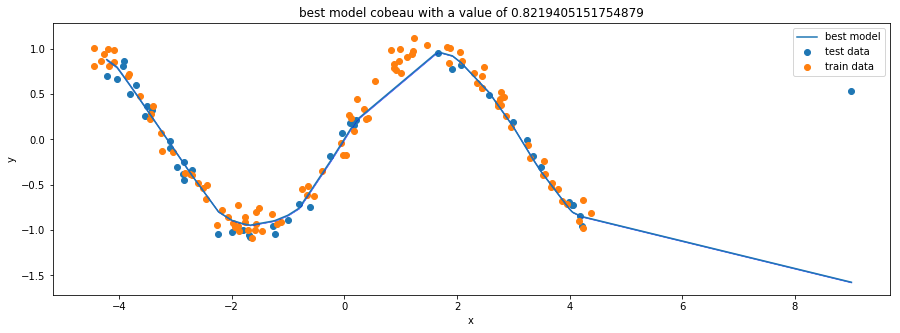

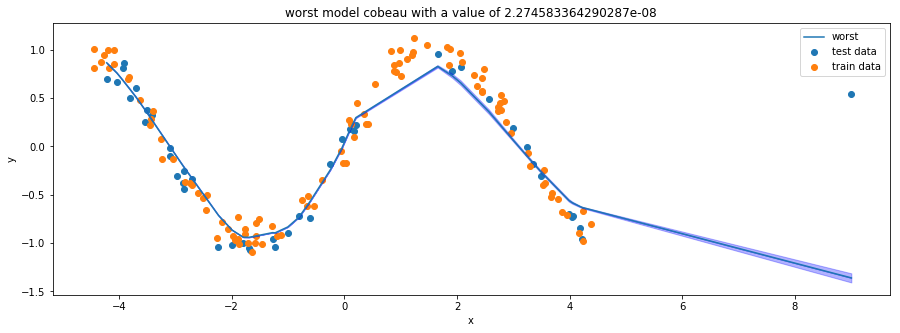

In [17]:
pd22 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 11:21:11.608180
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs


/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/thomas/Documents/Master-Thesis/new_version/evaluation.py:30: RuntimeWarning: divide by zero encountered in log
  logs = np.log(x)


experiment number 1 took 91.90696501731873 seconds. That means the whole run will probably take 275.7208950519562 more seconds and 4.5953482508659365 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 303.3315420150757 seconds with 3 experiments


/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


             cobeau  coverage      nlpd      rsme
count  3.000000e+00  3.000000  3.000000  3.000000
mean   3.335523e-01  0.066667       inf  0.173069
std    5.771607e-01  0.058794       NaN  0.039724
min    1.769975e-18  0.000000 -2.371105  0.129816
25%    3.284671e-04  0.044444 -1.433107  0.155643
50%    6.569342e-04  0.088889       NaN  0.181469
75%    5.003285e-01  0.100000       inf  0.194695
max    1.000000e+00  0.111111       inf  0.207922
\begin{tabular}{lrrrr}
\toprule
{} &        cobeau &  coverage &      nlpd &      rsme \\
\midrule
count &  3.000000e+00 &  3.000000 &  3.000000 &  3.000000 \\
mean  &  3.335523e-01 &  0.066667 &       inf &  0.173069 \\
std   &  5.771607e-01 &  0.058794 &       NaN &  0.039724 \\
min   &  1.769975e-18 &  0.000000 & -2.371105 &  0.129816 \\
25\%   &  3.284671e-04 &  0.044444 & -1.433107 &  0.155643 \\
50\%   &  6.569342e-04 &  0.088889 &       NaN &  0.181469 \\
75\%   &  5.003285e-01 &  0.100000 &       inf &  0.194695 \\
max   &  1.000000e+00

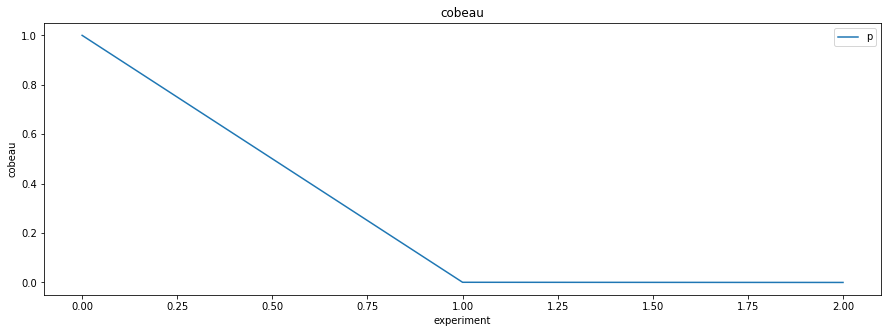

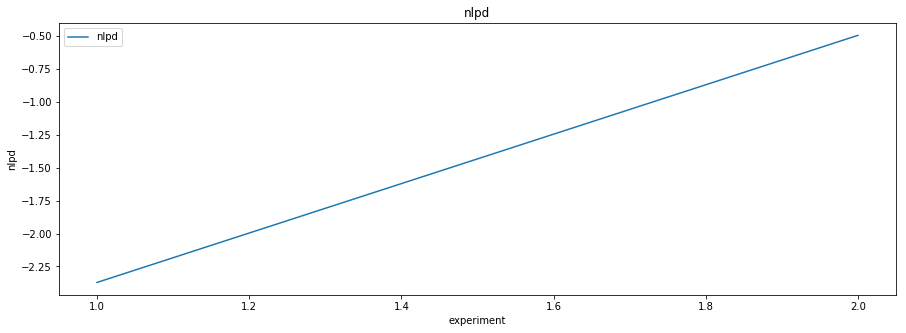

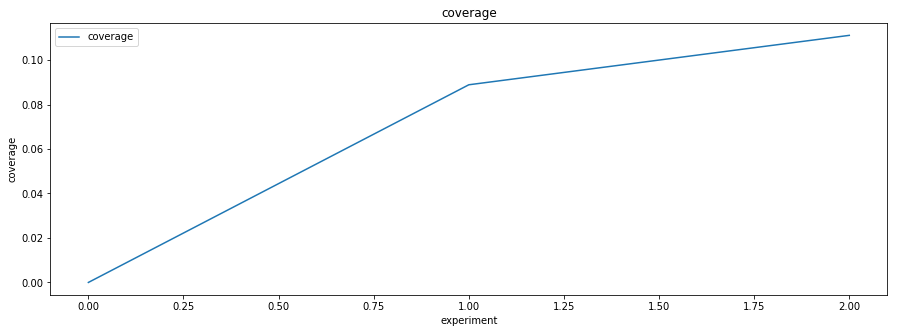

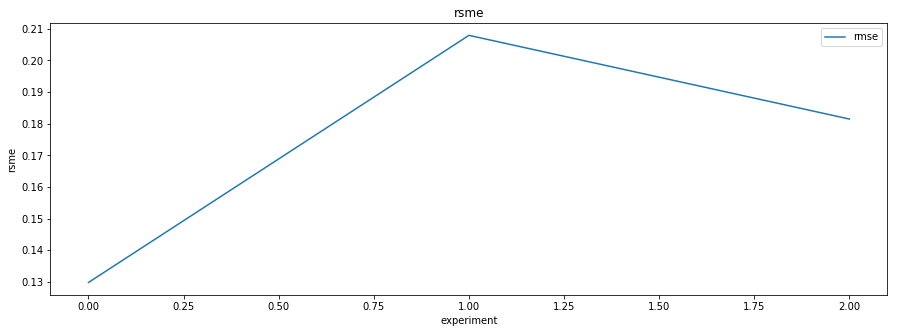

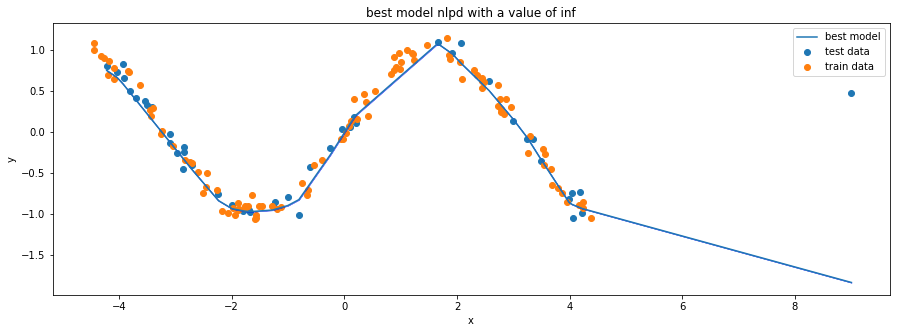

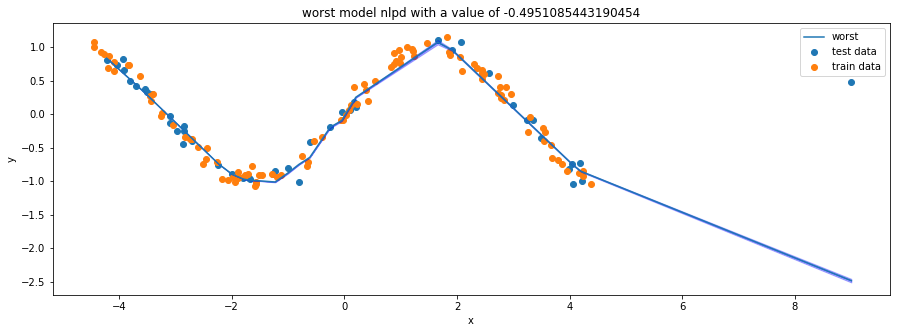

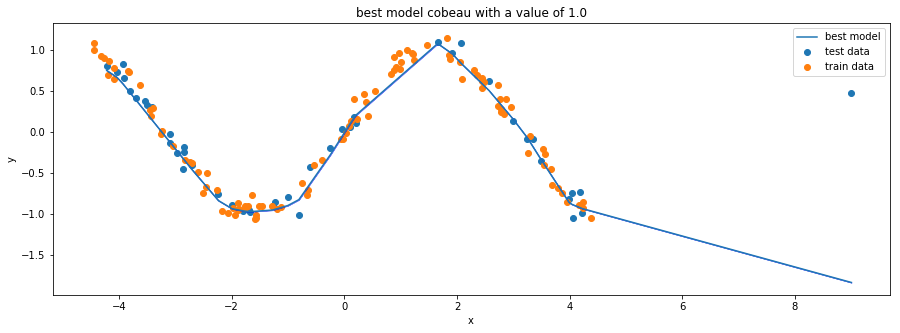

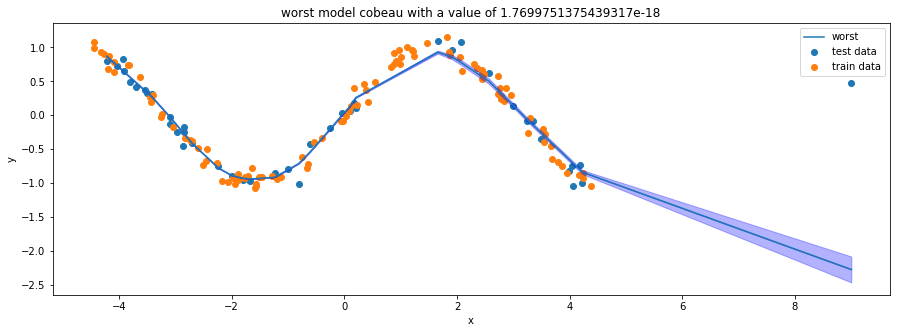

In [18]:
pd33 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 11:26:22.175995
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
experiment number 1 took 124.62116622924805 seconds. That means the whole run will probably take 373.86349868774414 more seconds and 6.2310583114624025 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
overall, it took 393.665198802948 seconds with 3 experiments
             cobeau  coverage        nlpd      rsme
count  3.000000e+00  3.000000    3.000000  3.000000
mean   2.262060e-01  0.014815 -192.694158  0.188611
std    2.728743e-01  0.012830  288.338594  0.041659
min    9.056347e-13  0.0

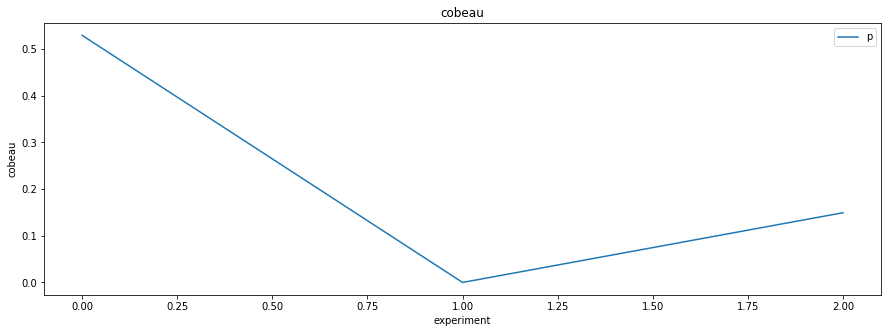

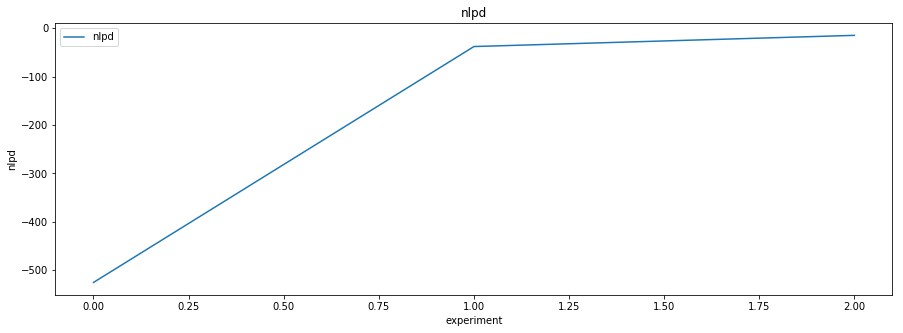

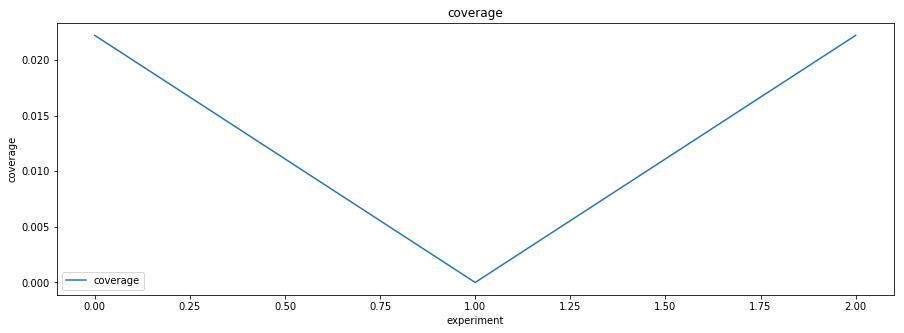

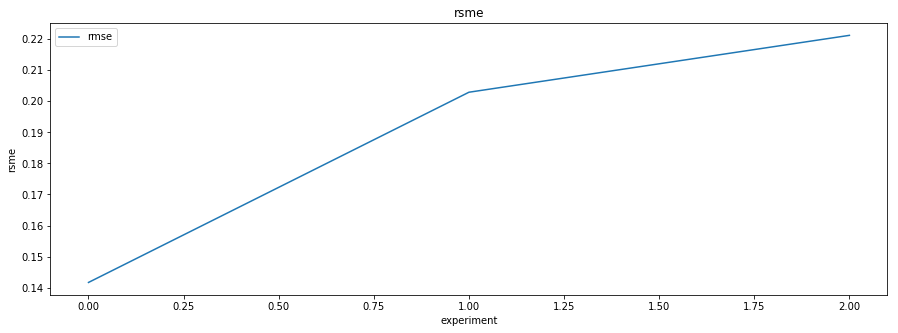

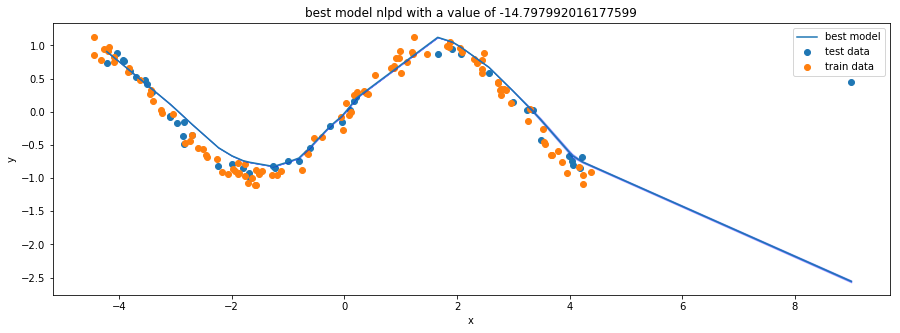

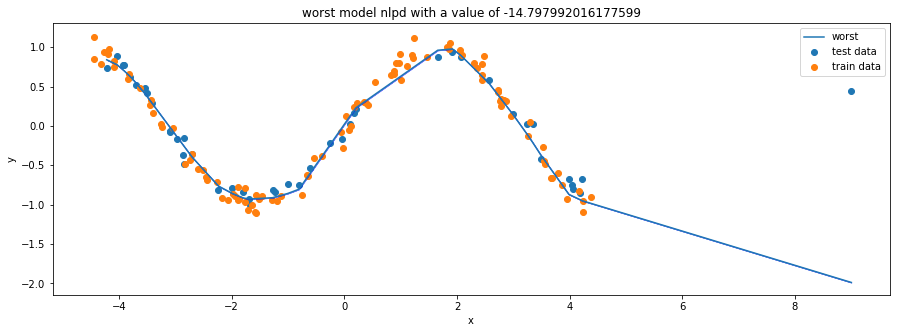

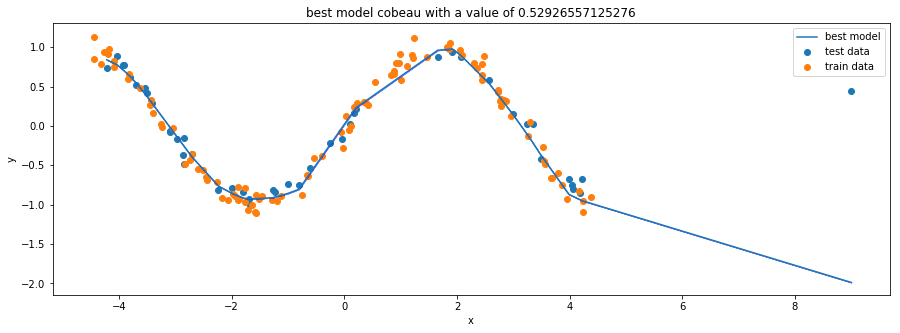

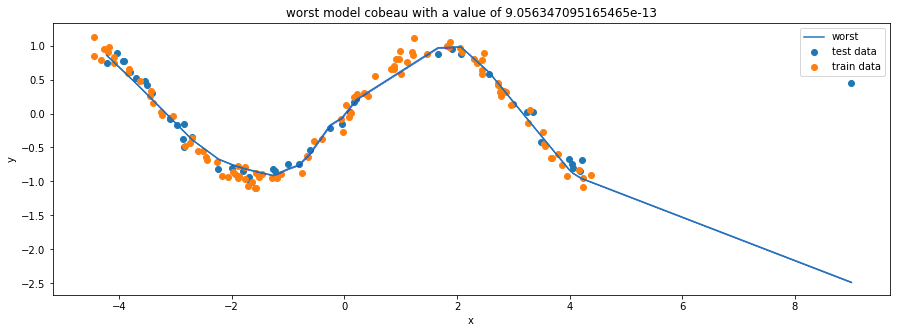

In [19]:
pd44 = repeat_experiment(BootstrapThroughTimeBobStrap, dataset_creation.NonlinearDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

# X3

In [8]:
dataset_params = {'seed':seed,'num_samples':num_samples,'scope':7}


experiment started at 2018-08-15 10:47:20.068692
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
experiment number 1 took 26.16218900680542 seconds. That means the whole run will probably take 78.48656702041626 more seconds and 1.308109450340271 more minutes.
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Ensemble <class 'ensembles.BootstrapEnsemble'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNetwork'>
initialising Network <class 'base.EnsembleNe

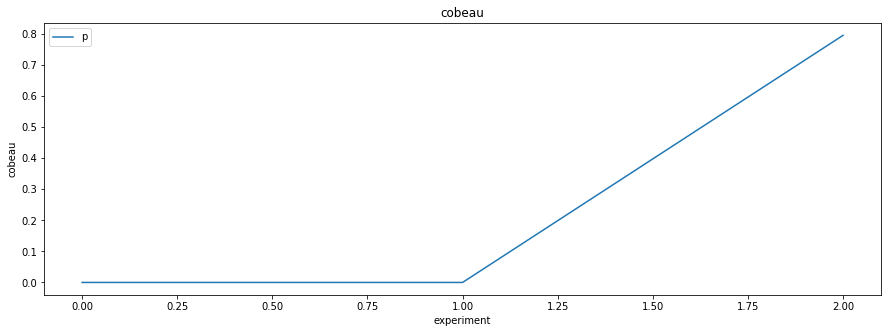

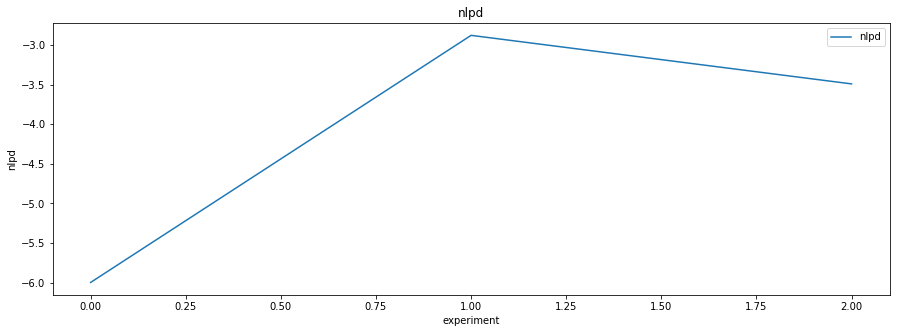

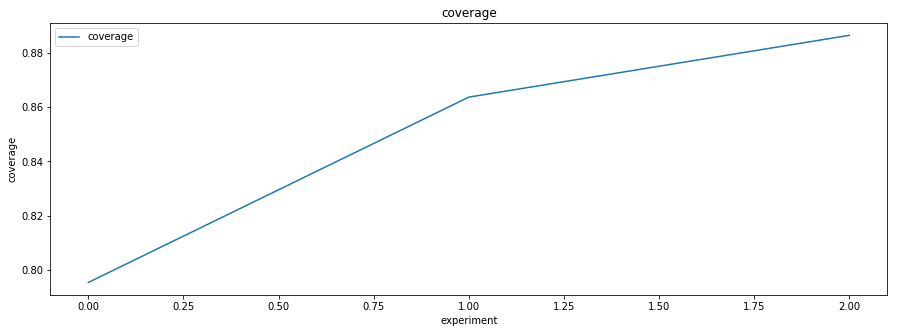

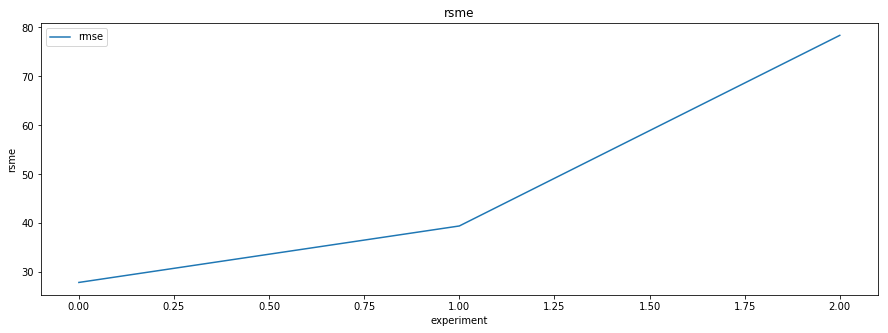

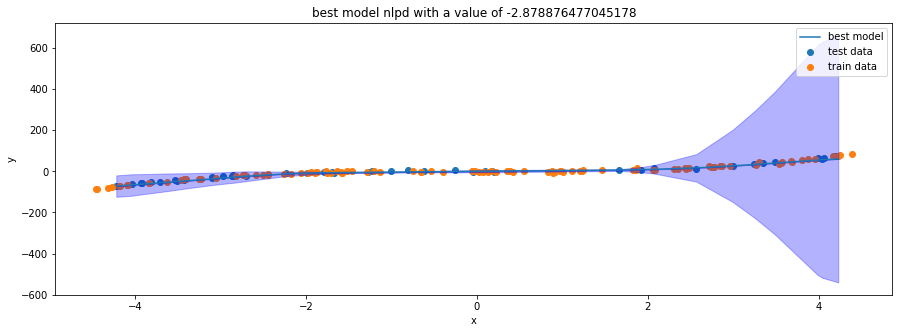

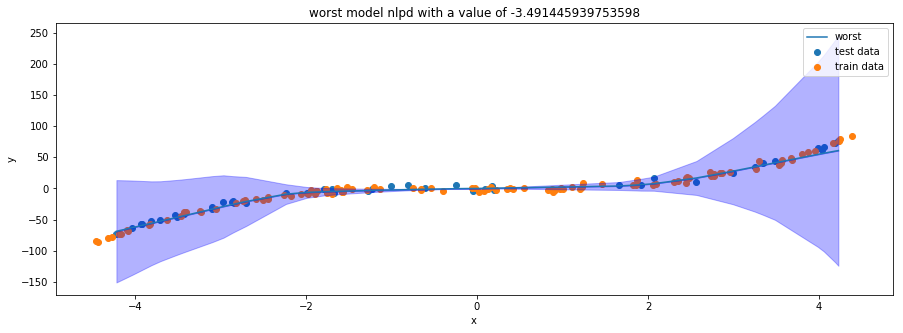

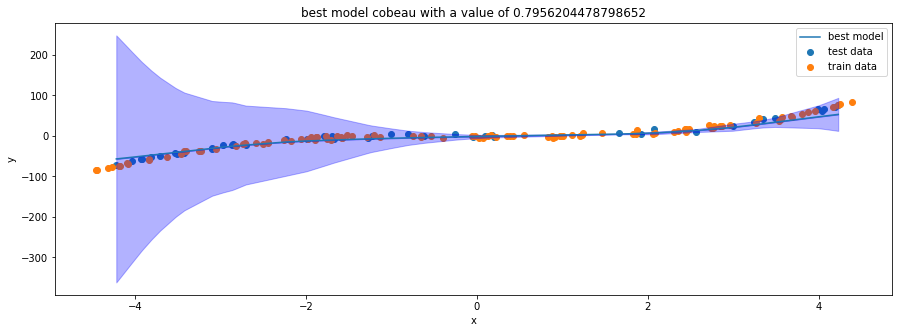

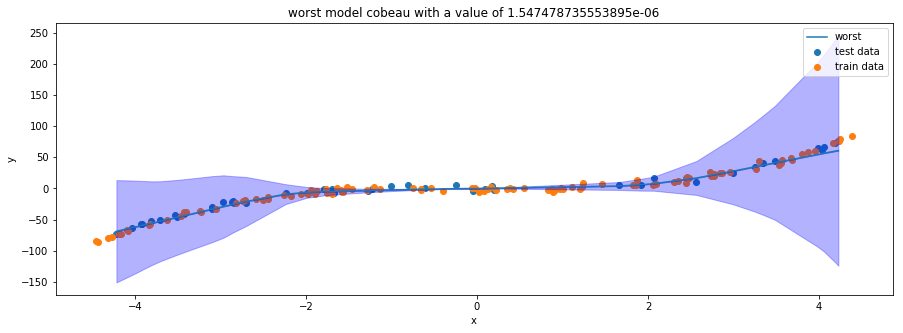

In [9]:
pd111 = repeat_experiment(BootstrapEnsemble, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,dataset_params=dataset_params)

experiment started at 2018-08-15 10:50:03.073890
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
experiment number 1 took 106.90609622001648 seconds. That means the whole run will probably take 320.71828866004944 more seconds and 5.345304811000824 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime'>
doing a burn in of 3 epochs
overall, it took 292.9330611228943 seconds with 3 experiments
         cobeau  coverage       nlpd       rsme
count  3.000000  3.000000   3.000000   3.000000
mean   0.128074  0.500000  -8.490495  11.080403
std    0.192345  0.180392   5.163239   0.462216
min    0.004367  0.

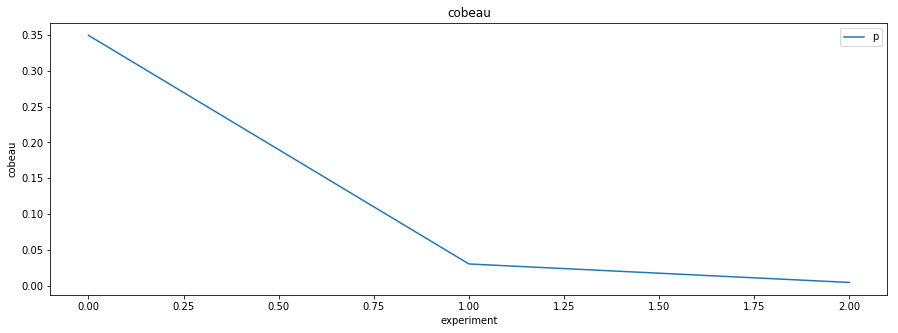

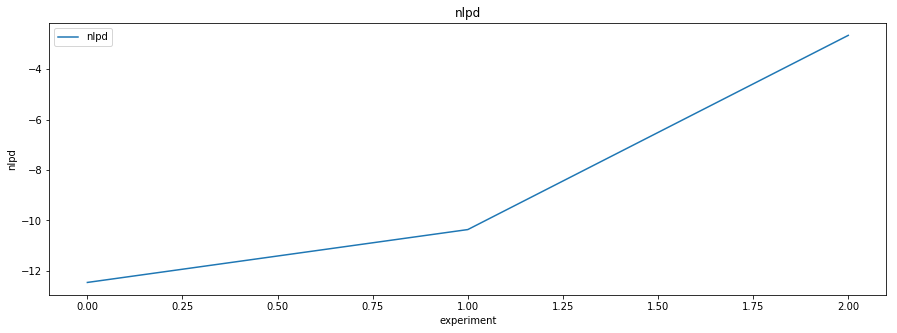

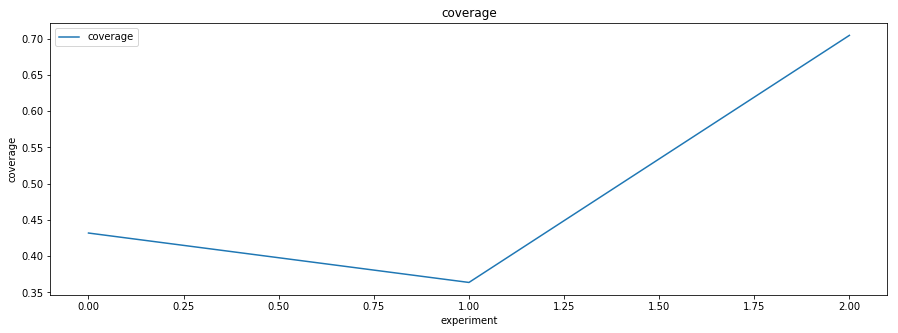

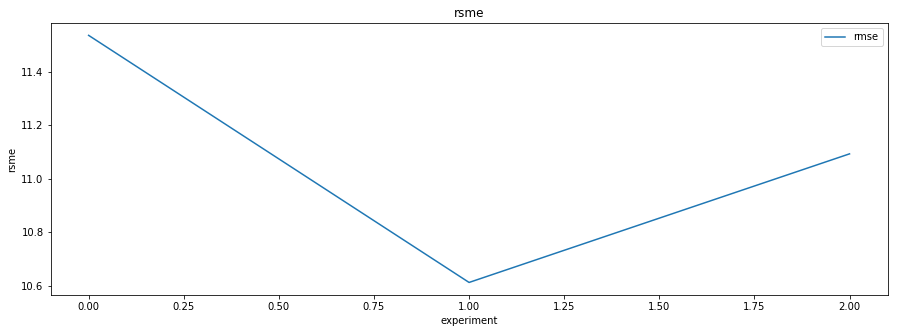

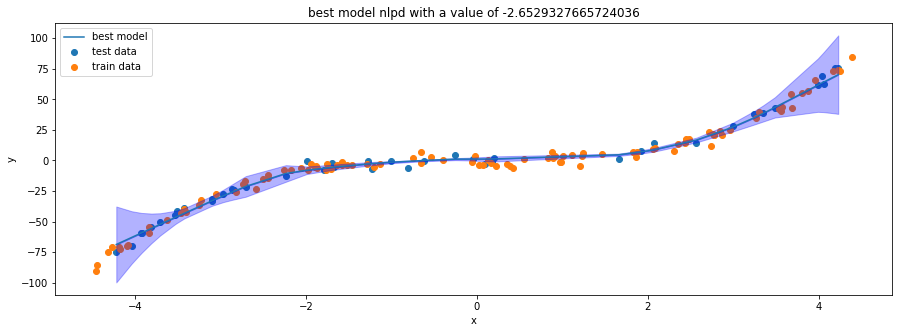

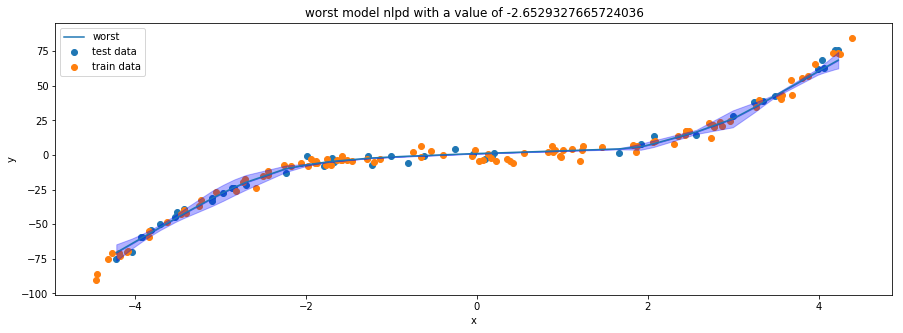

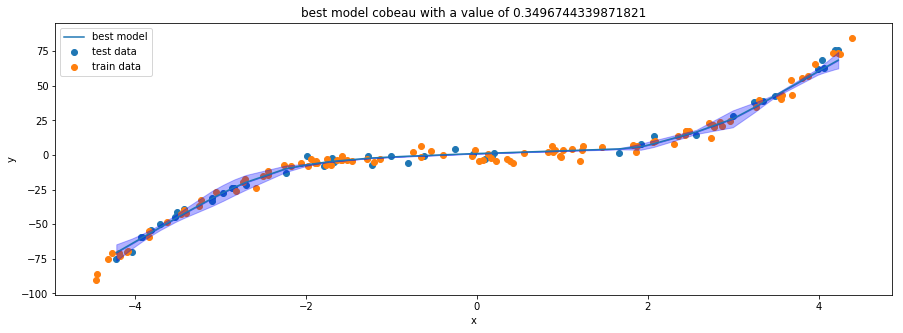

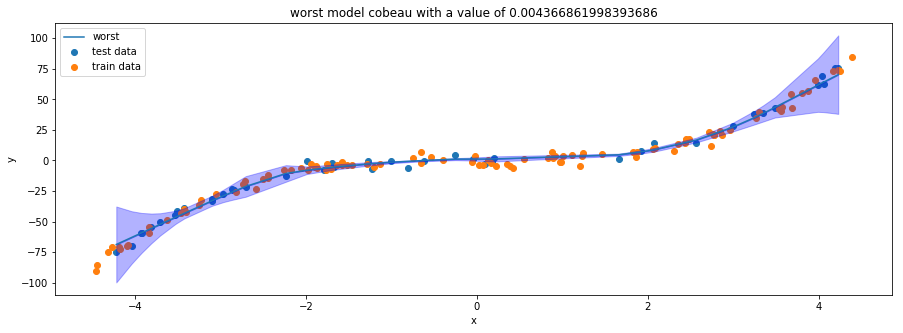

In [10]:
pd222 = repeat_experiment(ForcedDiversityBootstrapThroughTime, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 10:58:05.551292
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
experiment number 1 took 97.39172291755676 seconds. That means the whole run will probably take 292.1751687526703 more seconds and 4.869586145877838 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.ForcedDiversityBootstrapThroughTime3'>
doing a burn in of 3 epochs
overall, it took 279.4934391975403 seconds with 3 experiments
         cobeau  coverage        nlpd       rsme
count  3.000000  3.000000    3.000000   3.000000
mean   0.396120  0.545455  -47.417220  10.707203
std    0.339072  0.060131   70.804586   1.084791
min    0.15902

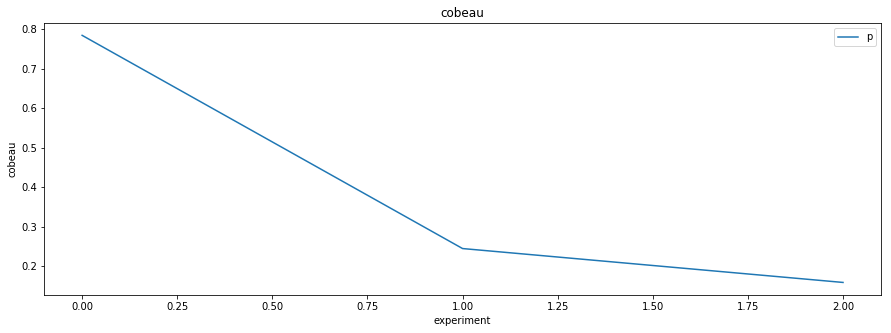

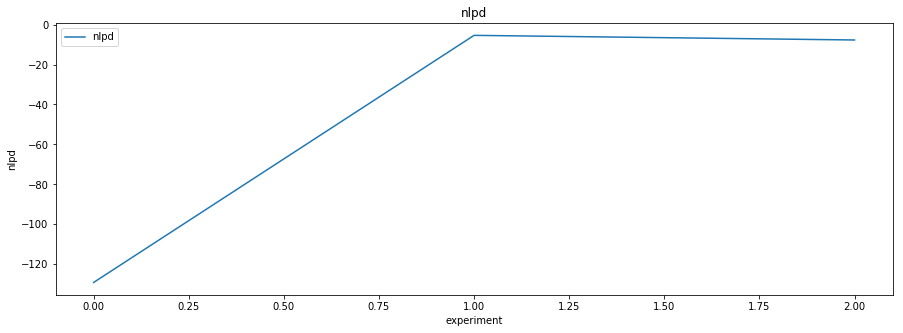

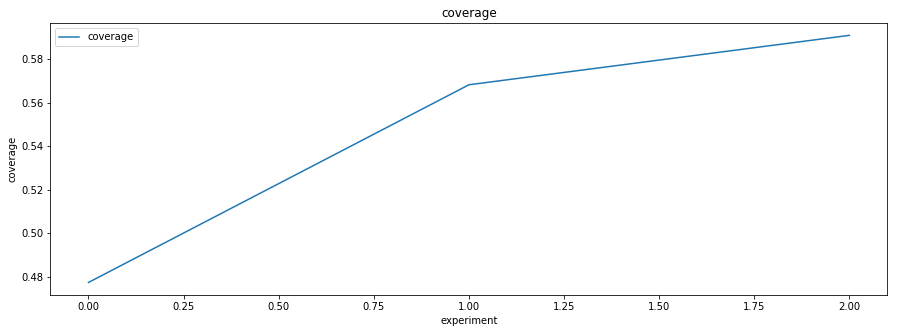

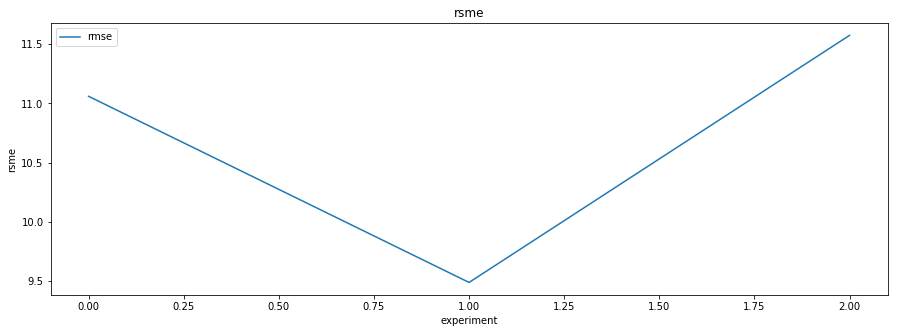

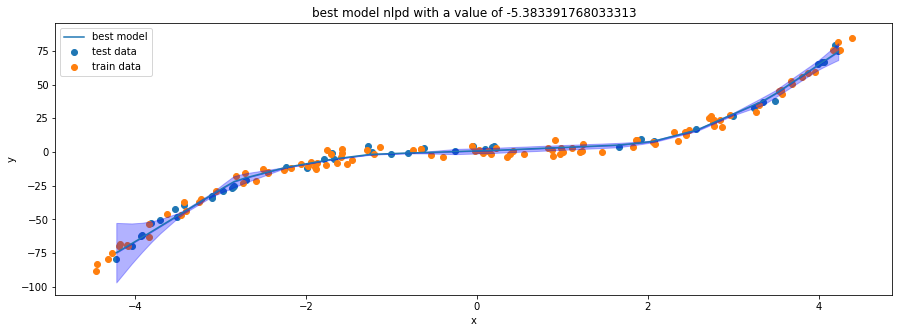

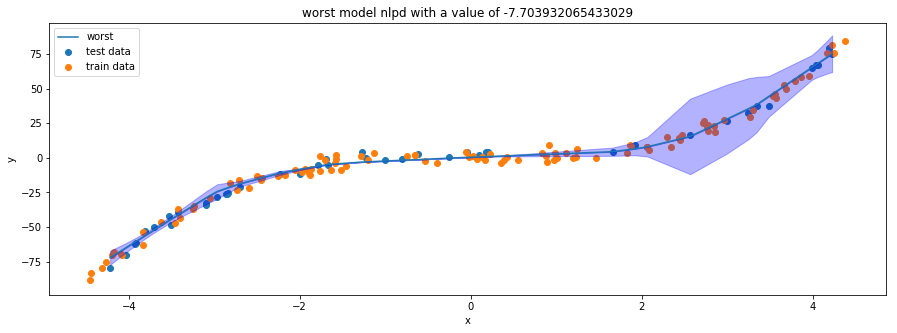

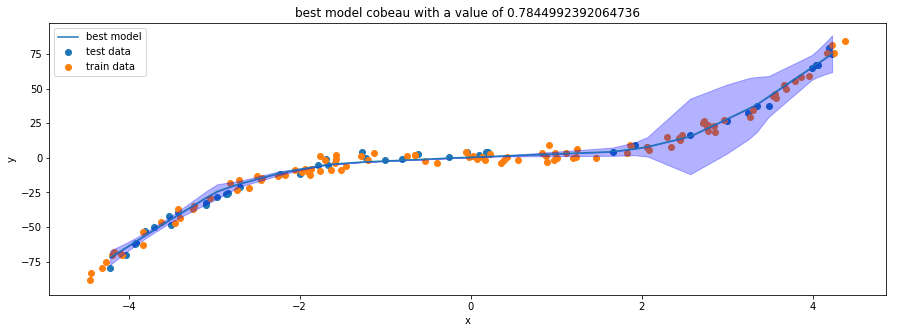

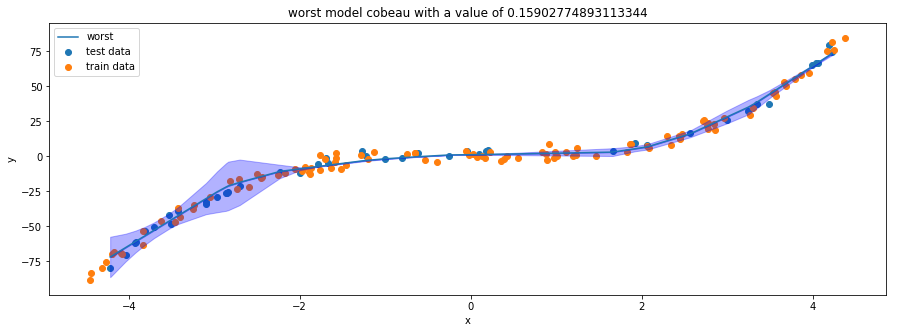

In [12]:
pd333 = repeat_experiment(ForcedDiversityBootstrapThroughTime3, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)

experiment started at 2018-08-15 11:04:27.425331
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
experiment number 1 took 85.1546790599823 seconds. That means the whole run will probably take 255.4640371799469 more seconds and 4.257733952999115 more minutes.
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
initialising Network <class 'networks.CopyNetwork'>
initialising
initialising Ensemble <class 'ensembles.BootstrapThroughTimeBobStrap'>
doing a burn in of 3 epochs
overall, it took 246.11099100112915 seconds with 3 experiments
         cobeau  coverage         nlpd      rsme
count  3.000000  3.000000     3.000000  3.000000
mean   0.585088  0.007576 -3159.771916  8.147497
std    0.102081  0.013122  1996.631454  0.590524
min    0.526002  0.000000 -5464.810741

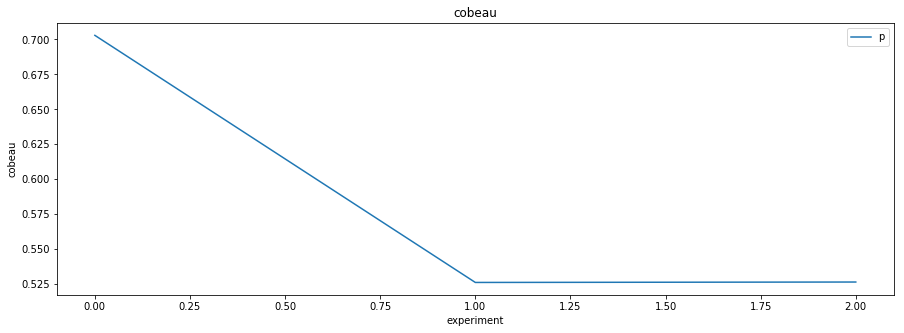

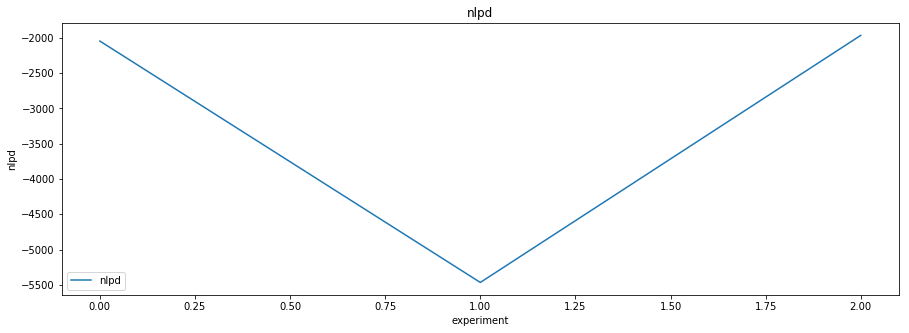

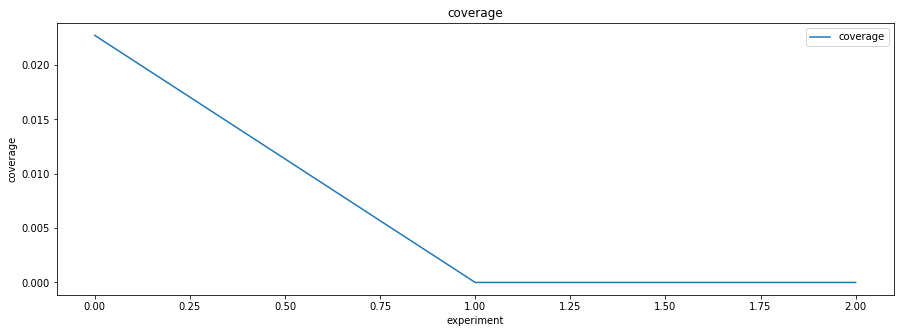

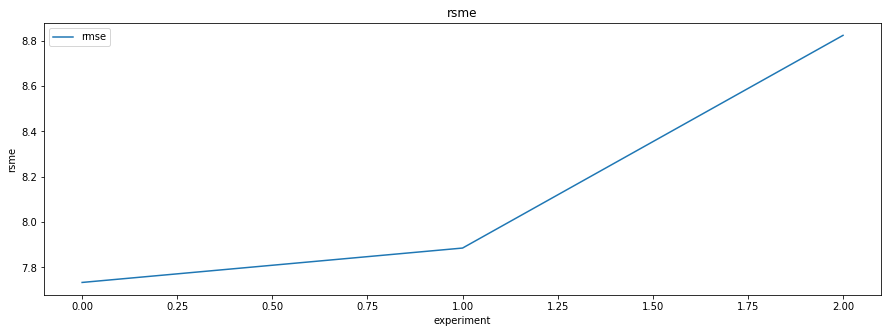

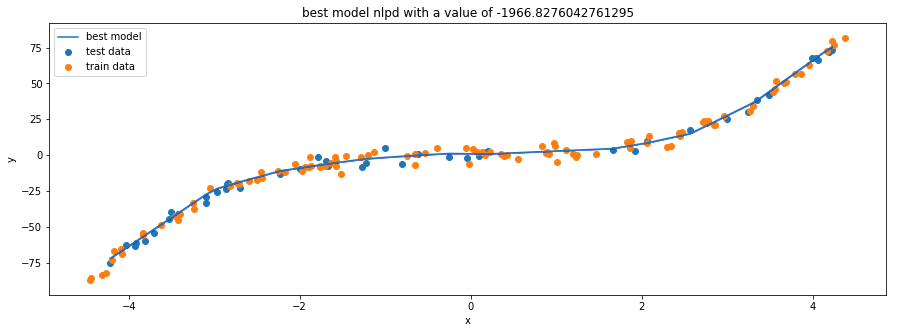

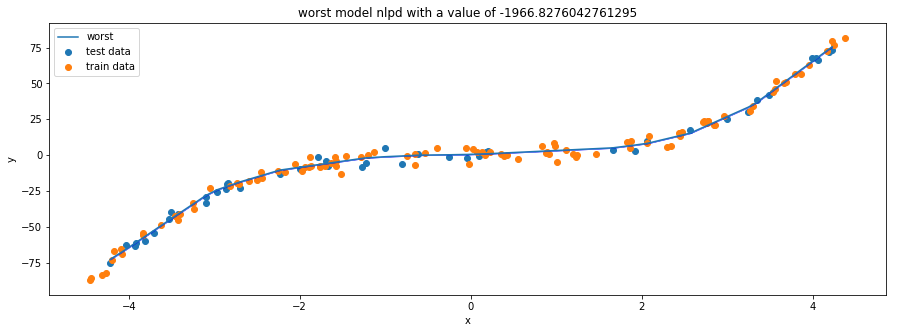

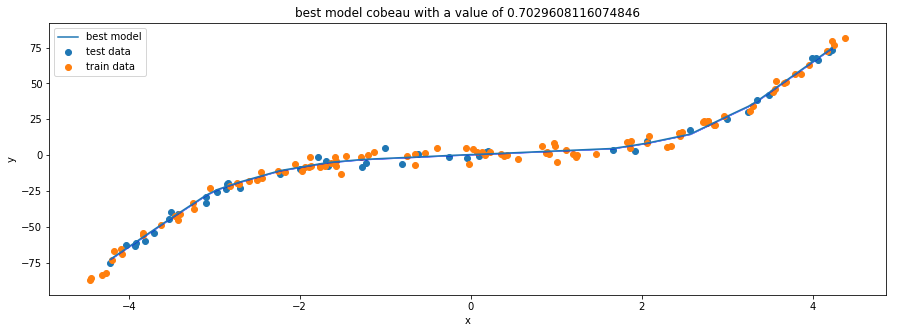

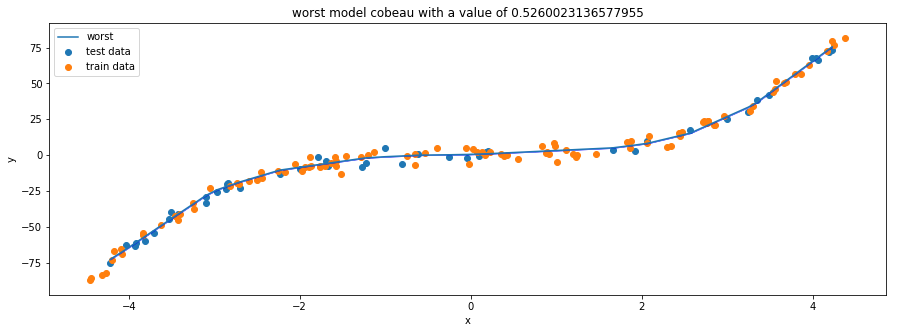

In [14]:
pd444 = repeat_experiment(BootstrapThroughTimeBobStrap, dataset_creation.XThreeDataset,num_meta_epochs=num_meta_epochs,model_params=model_params,
                        dataset_params=dataset_params)